# **Proyecto Inmuebles Bogotá**

**Integrantes:**


*   Sebastián Galvis Garcia
*   Valentina Cañon Cañon
*   Juan Pablo Abril






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Librerias

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Cargar Base de datos

In [ ]:
file_path = '/content/drive/My Drive/MachineLearning/Proyecto/BBDD/inmuebles.xlsx'
df_inmuebles = pd.read_excel(file_path)

In [ ]:
df_inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Estrato
0,Apartamento,Apartamento en venta en Madelena,2.0,1.0,38.0,Madelena,Arborizadora,152000000,1.0
1,Apartamento,Apartamento en venta en Madelena,2.0,1.0,38.0,Madelena,Arborizadora,152000000,1.0
2,Apartamento,Apartamento en venta en Madelena,2.0,1.0,40.0,Madelena,Arborizadora,160000000,1.0
3,Apartamento,Apartamento en venta en Madelena,2.0,1.0,39.0,Madelena,Arborizadora,160000000,1.0
4,Apartamento,Apartamento en venta en Madelena,2.0,1.0,40.0,Madelena,Arborizadora,177500000,1.0


In [ ]:
df_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9478 non-null   object 
 1   Descripcion   9478 non-null   object 
 2   Habitaciones  9478 non-null   float64
 3   Baños         9478 non-null   float64
 4   Área          9478 non-null   float64
 5   Barrio        9478 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Valor         9520 non-null   int64  
 8   Estrato       9478 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 669.5+ KB


Eliminación de duplicados y nulos

In [ ]:
df_inmuebles = df_inmuebles.drop_duplicates()
df_inmuebles = df_inmuebles.dropna()

In [ ]:
df_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5918 entries, 0 to 9477
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          5918 non-null   object 
 1   Descripcion   5918 non-null   object 
 2   Habitaciones  5918 non-null   float64
 3   Baños         5918 non-null   float64
 4   Área          5918 non-null   float64
 5   Barrio        5918 non-null   object 
 6   UPZ           5918 non-null   object 
 7   Valor         5918 non-null   int64  
 8   Estrato       5918 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 462.3+ KB


# Manejo de Outliers

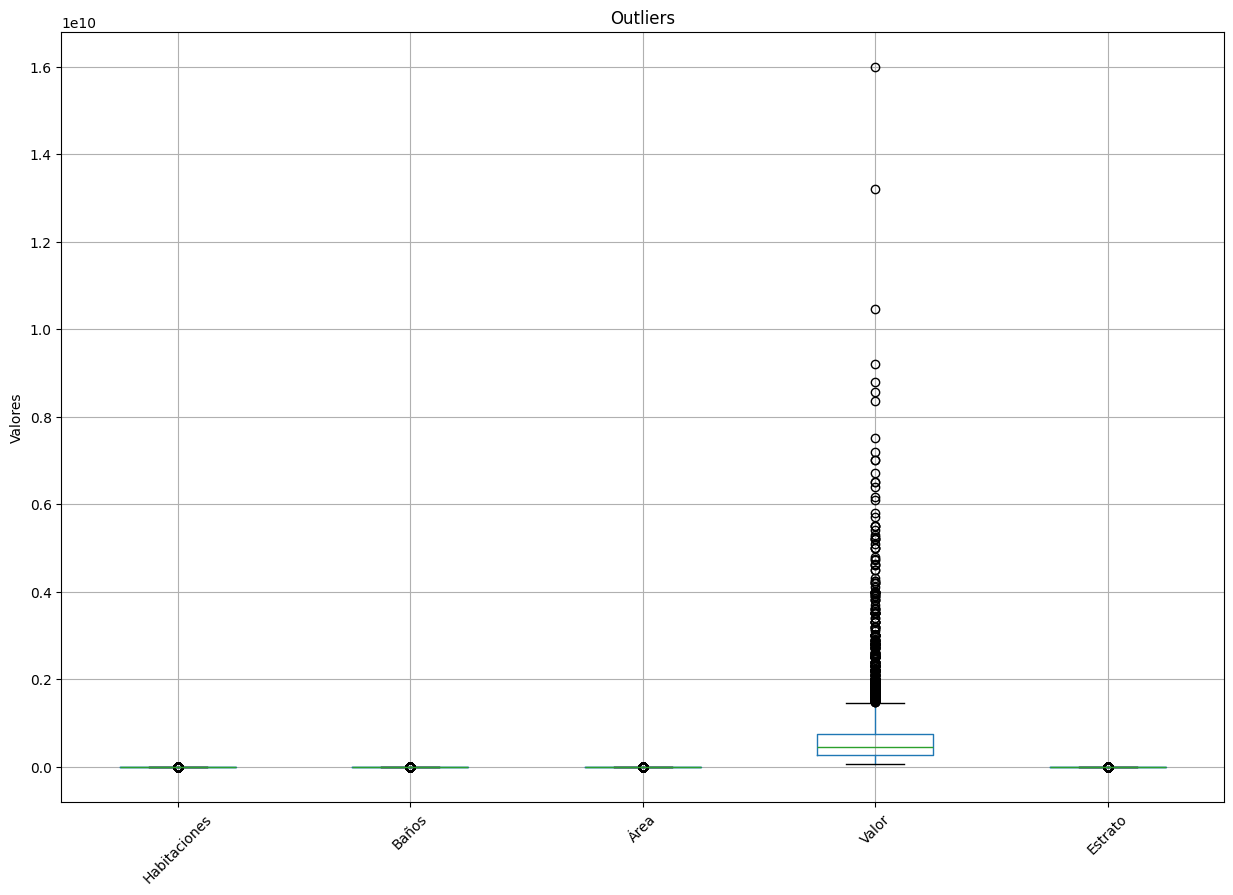

In [ ]:
columnas_numericas = ['Habitaciones', 'Baños', 'Área', 'Valor', 'Estrato']

df_inmuebles_sin_outliers = df_inmuebles.copy()

def manejar_outliers(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1                    # Rango intercuartílico

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar valores dentro de los límites
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

    return df
def graficar_caja_y_bigotes(df, columnas, titulo):
    plt.figure(figsize=(15, 10))
    df[columnas].boxplot()
    plt.title(titulo)
    plt.ylabel("Valores")
    plt.xticks(rotation=45)
    plt.show()

graficar_caja_y_bigotes(df_inmuebles, columnas_numericas, "Outliers")

Outliers de valor

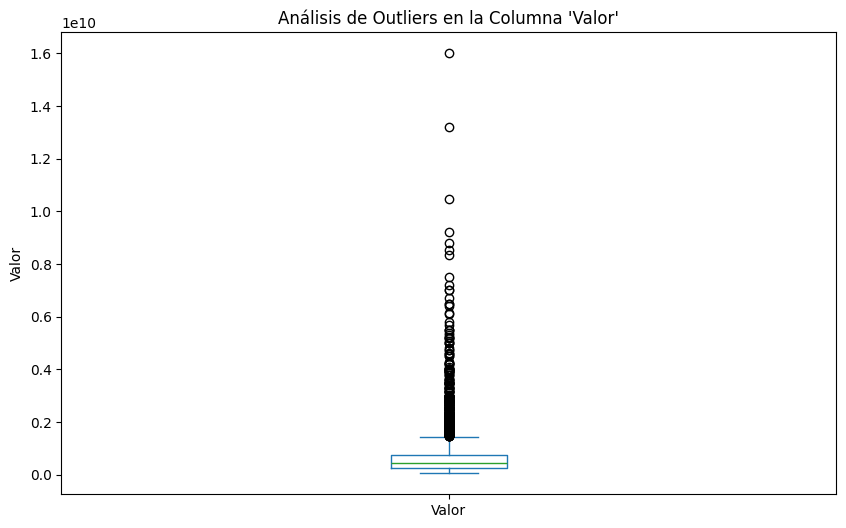

Estadísticas Descriptivas para 'Valor':
count    5.918000e+03
mean     6.550196e+08
std      7.668709e+08
min      6.000000e+07
25%      2.741500e+08
50%      4.485000e+08
75%      7.500000e+08
max      1.600000e+10
Name: Valor, dtype: float64


In [ ]:
def analizar_columna_valor(df):
    plt.figure(figsize=(10, 6))
    df['Valor'].plot(kind='box')
    plt.title("Análisis de Outliers en la Columna 'Valor'")
    plt.ylabel("Valor")
    plt.show()

    # Estadísticas descriptivas
    print("Estadísticas Descriptivas para 'Valor':")
    print(df['Valor'].describe())


# Análisis específico para la columna 'Valor'
analizar_columna_valor(df_inmuebles)

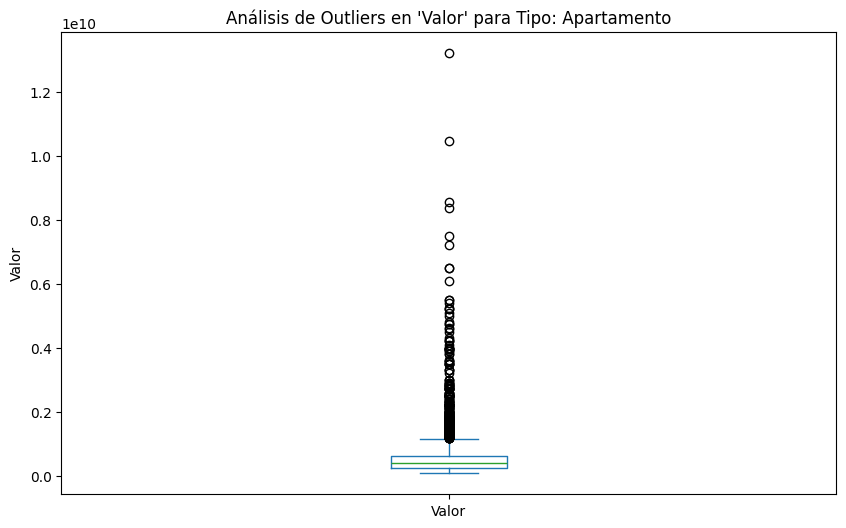

Estadísticas Descriptivas para 'Valor' en Tipo: Apartamento
count    4.435000e+03
mean     5.679363e+08
std      6.618390e+08
min      7.900000e+07
25%      2.550000e+08
50%      4.000000e+08
75%      6.200000e+08
max      1.320000e+10
Name: Valor, dtype: float64




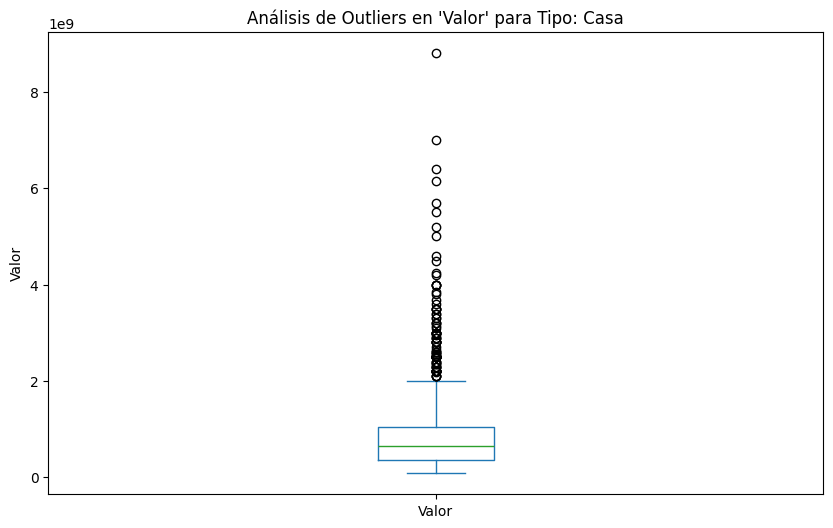

Estadísticas Descriptivas para 'Valor' en Tipo: Casa
count    1.379000e+03
mean     8.603838e+08
std      8.044785e+08
min      8.500000e+07
25%      3.700000e+08
50%      6.500000e+08
75%      1.050000e+09
max      8.800000e+09
Name: Valor, dtype: float64




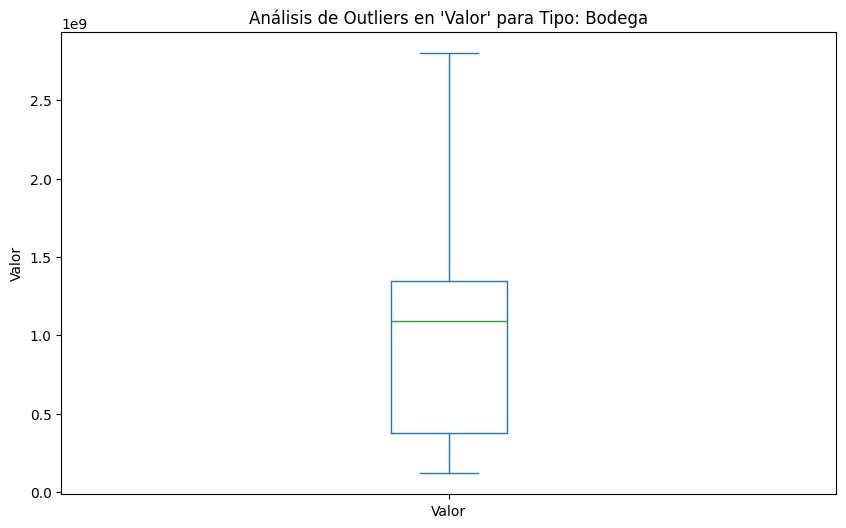

Estadísticas Descriptivas para 'Valor' en Tipo: Bodega
count    8.000000e+00
mean     1.089250e+09
std      9.001961e+08
min      1.200000e+08
25%      3.785000e+08
50%      1.090000e+09
75%      1.350000e+09
max      2.800000e+09
Name: Valor, dtype: float64




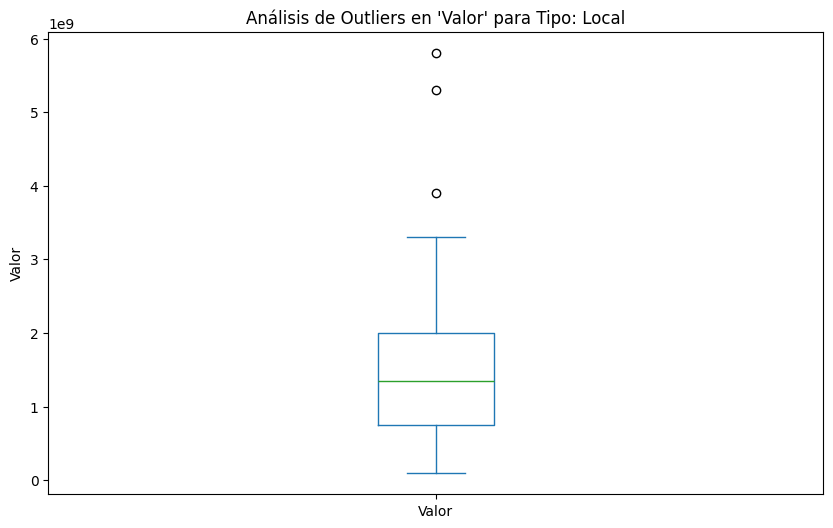

Estadísticas Descriptivas para 'Valor' en Tipo: Local
count    2.900000e+01
mean     1.688052e+09
std      1.391348e+09
min      9.450000e+07
25%      7.490000e+08
50%      1.350000e+09
75%      2.000000e+09
max      5.800000e+09
Name: Valor, dtype: float64




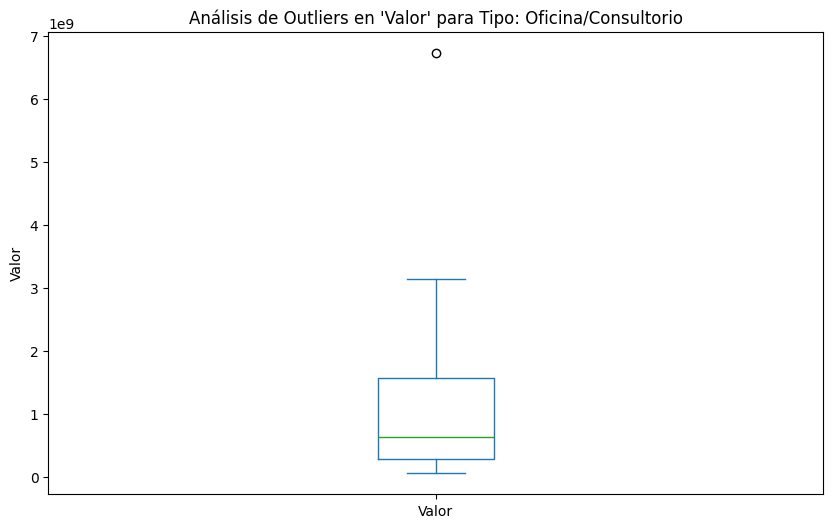

Estadísticas Descriptivas para 'Valor' en Tipo: Oficina/Consultorio
count    4.200000e+01
mean     1.015030e+09
std      1.181609e+09
min      6.000000e+07
25%      2.825000e+08
50%      6.400000e+08
75%      1.575000e+09
max      6.720791e+09
Name: Valor, dtype: float64




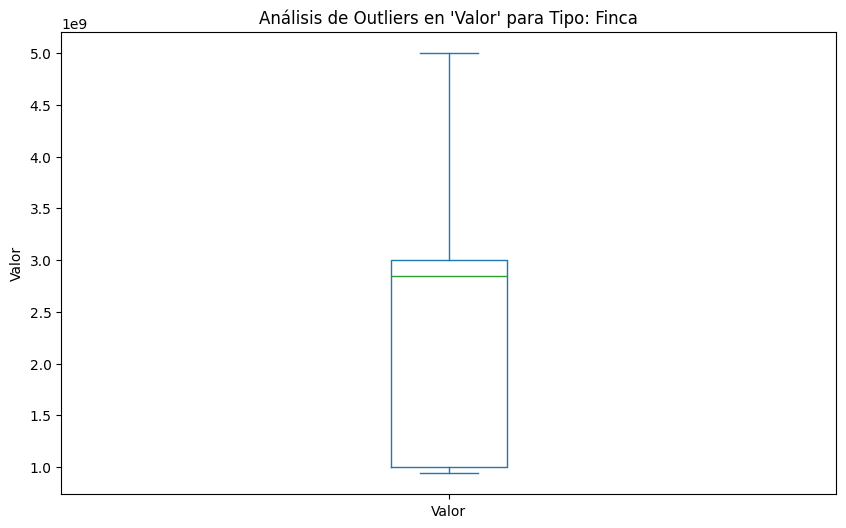

Estadísticas Descriptivas para 'Valor' en Tipo: Finca
count    5.000000e+00
mean     2.557855e+09
std      1.680151e+09
min      9.392750e+08
25%      1.000000e+09
50%      2.850000e+09
75%      3.000000e+09
max      5.000000e+09
Name: Valor, dtype: float64




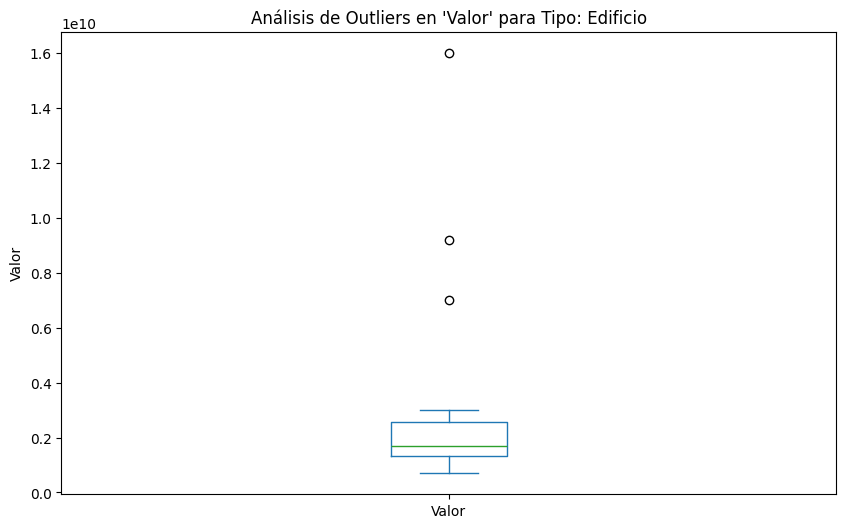

Estadísticas Descriptivas para 'Valor' en Tipo: Edificio
count    1.600000e+01
mean     3.343812e+09
std      4.094158e+09
min      7.000000e+08
25%      1.337500e+09
50%      1.700000e+09
75%      2.550000e+09
max      1.600000e+10
Name: Valor, dtype: float64




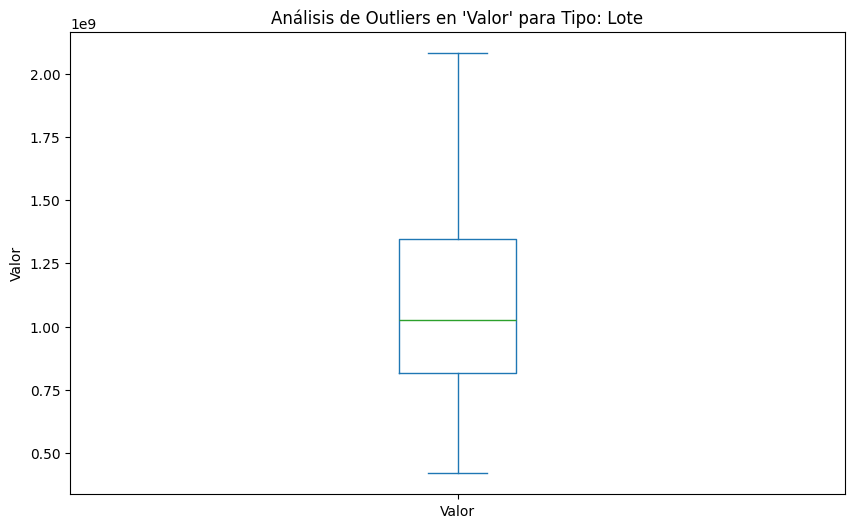

Estadísticas Descriptivas para 'Valor' en Tipo: Lote
count    4.000000e+00
mean     1.137500e+09
std      6.927421e+08
min      4.200000e+08
25%      8.175000e+08
50%      1.025000e+09
75%      1.345000e+09
max      2.080000e+09
Name: Valor, dtype: float64




In [ ]:
def segmentar_por_tipo(df):
    tipos = df['Tipo'].unique()
    for tipo in tipos:
        subset = df[df['Tipo'] == tipo]
        plt.figure(figsize=(10, 6))
        subset['Valor'].plot(kind='box')
        plt.title(f"Análisis de Outliers en 'Valor' para Tipo: {tipo}")
        plt.ylabel("Valor")
        plt.show()

        print(f"Estadísticas Descriptivas para 'Valor' en Tipo: {tipo}")
        print(subset['Valor'].describe())
        print("\n")
segmentar_por_tipo(df_inmuebles)

Cómo el valor de los inmuebles cambia segun el estrato, área, ubicación, parecieran outliers pero no lo son

Estandarización:

In [ ]:
columnas_numericas = ['Habitaciones', 'Baños', 'Área', 'Estrato', 'Valor']
df_inmuebles_estandarizado = df_inmuebles.copy()
scaler = StandardScaler()
df_inmuebles_estandarizado[columnas_numericas] = scaler.fit_transform(df_inmuebles[columnas_numericas])
df_inmuebles_estandarizado.head()


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Estrato
0,Apartamento,Apartamento en venta en Madelena,-0.501349,-1.193860,-0.058706,Madelena,Arborizadora,-0.655993,-2.39917
2,Apartamento,Apartamento en venta en Madelena,-0.501349,-1.193860,-0.057789,Madelena,Arborizadora,-0.645560,-2.39917
3,Apartamento,Apartamento en venta en Madelena,-0.501349,-1.193860,-0.058248,Madelena,Arborizadora,-0.645560,-2.39917
4,Apartamento,Apartamento en venta en Madelena,-0.501349,-1.193860,-0.057789,Madelena,Arborizadora,-0.622738,-2.39917
5,Apartamento,Apartamento en venta en Madelena,-0.069662,-0.421447,-0.051369,Madelena,Arborizadora,-0.622086,-2.39917


Matriz de Correlación

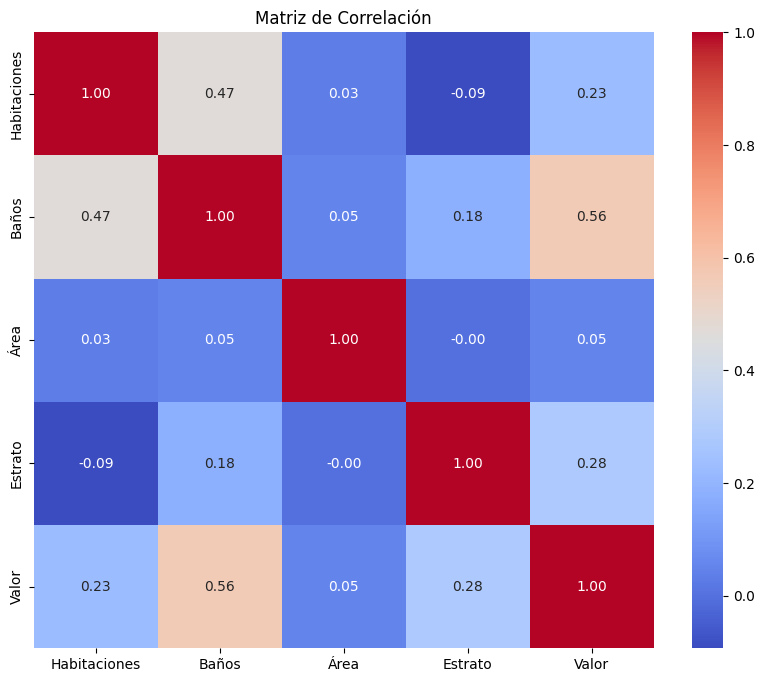

In [ ]:
correlation_matrix = df_inmuebles_estandarizado[columnas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matriz de Correlación")
plt.show()

# Regresión Lineal

In [ ]:
X = df_inmuebles[['Habitaciones', 'Estrato', 'Baños', 'Tipo', 'Área']]
y = df_inmuebles['Valor']

Convertir la variable categórica Tipo a variable numérica mediante OneHotEncoder

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tipo', OneHotEncoder(), ['Tipo']),
        ('num', 'passthrough', ['Habitaciones', 'Estrato', 'Baños', 'Área'])
    ])

Creación de un modelo de regresión lineal dentro de un Pipeline

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

División de la base de datos en prueba y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tipo', OneHotEncoder(),
                                                  ['Tipo']),
                                                 ('num', 'passthrough',
                                                  ['Habitaciones', 'Estrato',
                                                   'Baños', 'Área'])])),
                ('regressor', LinearRegression())])

Predicciones

In [ ]:
y_pred = model.predict(X_test)

Validación


In [ ]:
oportunidades = X_test.copy()
oportunidades['ValorReal'] = y_test
oportunidades['ValorPredicho'] = y_pred
oportunidades['OportunidadCompra'] = oportunidades['ValorReal'] < oportunidades['ValorPredicho']

# Mostrar las oportunidades de compra
print(oportunidades[oportunidades['OportunidadCompra']])

      Habitaciones  Estrato  Baños         Tipo   Área  ValorReal  \
3937           3.0      3.0    2.0  Apartamento   43.0  130000000   
8178           1.0      4.0    2.0  Apartamento   56.0  515000000   
9326           3.0      5.0    3.0  Apartamento  150.0  795000000   
7535           3.0      4.0    2.0  Apartamento   74.0  340000000   
6327           4.0      3.0    3.0         Casa  135.0  350000000   
...            ...      ...    ...          ...    ...        ...   
4475           3.0      4.0    1.0  Apartamento   53.0  177000000   
2213           2.0      4.0    3.0  Apartamento   85.0  420000000   
2388           1.0      4.0    2.0  Apartamento   72.0  520000000   
3260           3.0      3.0    2.0  Apartamento   85.0  374500000   
1285           2.0      6.0    3.0  Apartamento  100.0  870000000   

      ValorPredicho  OportunidadCompra  
3937   3.730783e+08               True  
8178   5.319581e+08               True  
9326   9.688322e+08               True  
7535   

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE y el R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"R²: {r2}")


Error cuadrático medio (MSE): 3.372617971039967e+18
R²: -6.545667634988981


# Random Forest

In [ ]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tipo', OneHotEncoder(),
                                                  ['Tipo']),
                                                 ('num', 'passthrough',
                                                  ['Habitaciones', 'Estrato',
                                                   'Baños', 'Área'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Predicción

In [ ]:
y_pred_rf = rf_model.predict(X_test)

Evaluar el modelo

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Error cuadrático medio (MSE) - Random Forest: {mse_rf}")
print(f"R² - Random Forest: {r2_rf}")

Error cuadrático medio (MSE) - Random Forest: 1.7116520326284582e+17
R² - Random Forest: 0.6170465360775781


# Grind search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a buscar
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Evaluar el modelo optimizado
y_pred_grid = grid_search.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print(f"Error cuadrático medio (MSE) - Optimizado: {mse_grid}")
print(f"R² - Optimizado: {r2_grid}")


Mejores parámetros encontrados:  {'regressor__max_depth': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 50}
Error cuadrático medio (MSE) - Optimizado: 1.6558970526871862e+17
R² - Optimizado: 0.629520778676202


# Oportunidades de compra

Realizar las predicciones para todo el conjunto de datos (X)

In [ ]:
# Establecer el umbral al 30%
umbral = 0.3

# Filtrar oportunidades de compra con una diferencia mayor al 30%
oportunidades_filtradas = oportunidades[oportunidades['ValorPredicho'] > (1 + umbral) * oportunidades['Valor']]

# Mostrar las primeras filas de las oportunidades filtradas
print(oportunidades_filtradas[['Tipo', 'Valor', 'ValorPredicho', 'OportunidadCompra']])


             Tipo      Valor  ValorPredicho  OportunidadCompra
15           Casa  280000000   4.325796e+08               True
41    Apartamento  265000000   3.837629e+08               True
44           Casa  480000000   7.146421e+08               True
148          Casa  120000000   2.524826e+08               True
219   Apartamento  125000000   2.411897e+08               True
...           ...        ...            ...                ...
9407  Apartamento  970000000   1.273176e+09               True
9450         Casa  240000000   4.363048e+08               True
9467  Apartamento  210000000   3.778680e+08               True
9475  Apartamento  240000000   5.188310e+08               True
9476  Apartamento  250000000   5.188310e+08               True

[2468 rows x 4 columns]
